# Unsupervised Machine Learning

## Dataset:

https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Problem Statement:

To predict the optimum number of clusters for the given dataset and represent them visually.

In [22]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

## Pictorial description of the dataset

https://drive.google.com/file/d/1-4w_1zFHTtDBf8x3GdgV-IxamxxPjGaL/view?usp=sharing

In [23]:
# Load the dataset
file = 'D:/Downloads/Iris.csv'
data = pd.read_csv(file)
print('Created dataset successfully')
data.head(5)

Created dataset successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Full - length summary of the IRIS Dataset

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


The IRIS Dataset consists of 6 attributes of the Iris flower that describe  it's petal and sepal width and height and also the species to which it belongs. 

Clustering is an unsupervised technique, therefore we do not require labels in our dataset. We will use the <b>drop</b> function to eliminate the Species column.

In [25]:
data.drop(["Species"], axis=1, inplace = True)

In [26]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Let's now plot a <b>pair plot</b> to check for a relationship between the attributes, which could help reduce the number of attributes in the dataset.

In [34]:
sns.pairplot(data.drop('Id', axis = 1))


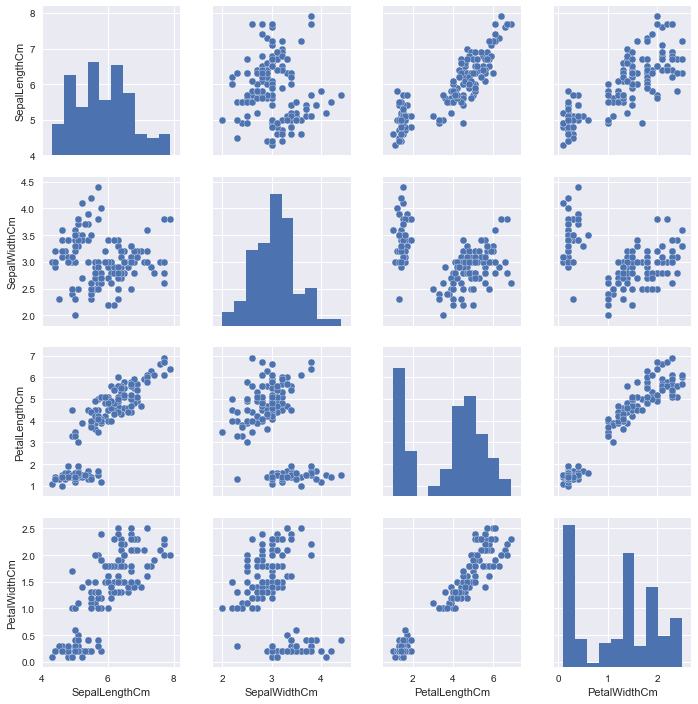

In [35]:
plt.show()

From the above plot it is clear that there exists a positive correlation between <i> PetalLength </i> and <i> PetalWidth </i>. 

In [48]:
x = data.iloc[:, [0, 1, 2, 3]].values

# K-Means Clustering

In [49]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plotting the <i>within cluster sum of squares</i> onto a line graph.

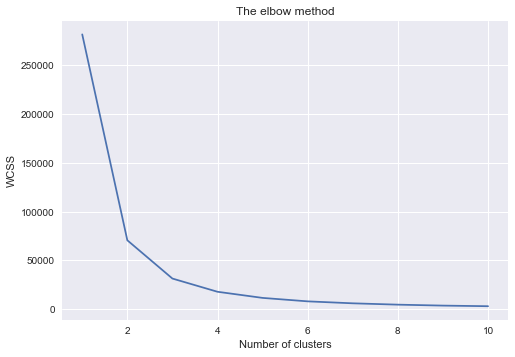

In [50]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the above plot we observe an <b>elbow</b>. The bend indicates our <i>optimum cluster count</i> i,e <b>3</b>. 

Creating the KMeans Classifier

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [61]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

Plotting the Centroid

In [62]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

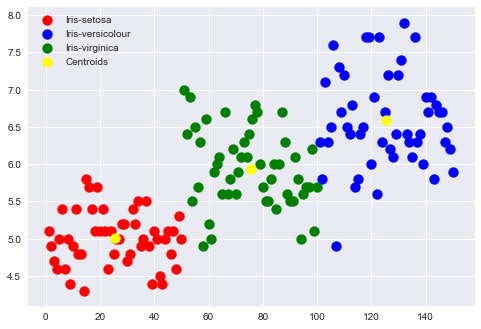

In [63]:
plt.show()

# Conclusion

The optimum number of clusters for the IRIS dataset is <b><i>3</i></b>